# Modeling ODE with only absorted solar radiation to predict the change in temperature for 200 years from 1850 and visualizing the model

In [ ]:
#from sympy import solve
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

S = 1368
α = 0.3
absorbed_solar_radiation = S*(1 - α)/4
temp0 = 14
C = 51.0

F = lambda t, s: (1/C) * absorbed_solar_radiation
t_span = [0, 210]
s0 = [temp0]
t_eval = np.arange(0, 210, 50)
sol = solve_ivp(F, t_span, s0, t_eval=t_eval)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0,  50, 100, 150, 200])
 t_events: None
        y: array([[ 14.        , 248.70588235, 483.41176471, 718.11764706,
        952.82352941]])
 y_events: None

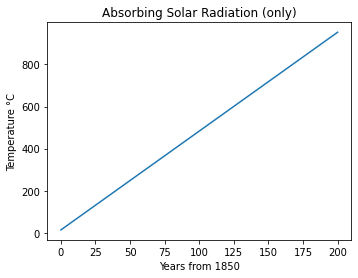

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.title('Absorbing Solar Radiation (only)')
plt.xlabel('Years from 1850')
plt.ylabel('Temperature °C')
plt.show()

# Extending the model with thermal radiation and visualizing it

In [ ]:
B = 1.3
start_temp = 14 #0->28, default: 14
F1 = lambda t, s: (1/C) * B * (temp0-s)
t_span = [0, 210]
s0 = [start_temp]
t_eval = np.arange(0, 210, 50)
sol = solve_ivp(F1, t_span, s0, t_eval=t_eval)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0,  50, 100, 150, 200])
 t_events: None
        y: array([[14., 14., 14., 14., 14.]])
 y_events: None

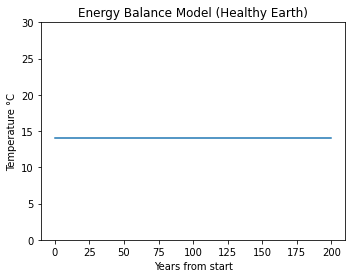

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.title('Energy Balance Model (Healthy Earth)')
plt.xlabel('Years from start')
plt.ylabel('Temperature °C')
plt.ylim(0, 30)
plt.show()

# Extending the model with Greenhouse Effects and visualizing it

In [ ]:
def calc_greenhouse_effect(CO2):
  return forcing_coef*np.log(CO2/CO2_PreIndust)

forcing_coef = 5.0
CO2_PreIndust = 280.0
calc_greenhouse_effect(CO2_PreIndust * (1 + np.power((15/220), 3)))

0.0015845535506302491

In [ ]:
F2 = lambda t, s: (1/C) * (B * (temp0-s) + calc_greenhouse_effect(CO2_PreIndust * (1 + np.power((t/220), 3))))
sol = solve_ivp(F2, [0, 210], [start_temp], t_eval=np.arange(0, 210, 50))
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0,  50, 100, 150, 200])
 t_events: None
        y: array([[14.        , 14.00769389, 14.14788232, 14.57018498, 15.3856948 ]])
 y_events: None

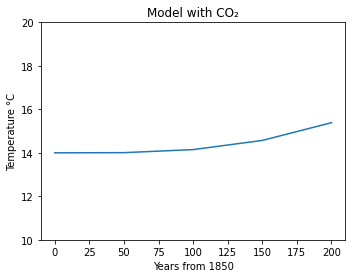

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.title('Model with CO₂')
plt.xlabel('Years from 1850')
plt.ylabel('Temperature °C')
plt.ylim(10, 20)
plt.show()

In [ ]:
tmp_CO2 = []
for i in range(1850, 2021):
  t_year = i - 1850
  CO2_from_1850 = CO2_PreIndust * (1 + np.power((t_year/220), 3))
  tmp_CO2.append(CO2_from_1850)
tmp_CO2

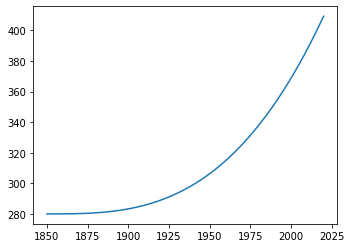

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(range(1850, 2021), tmp_CO2)
plt.show()

# Compare with NASA

In [ ]:
import pandas as pd

url ='https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'
df = pd.read_csv(url, skiprows=3, sep='\s+').drop(0)
df

,Year,No_Smoothing,Lowess(5)
1,1880,-0.15,-0.08
2,1881,-0.07,-0.12
3,1882,-0.10,-0.15
4,1883,-0.17,-0.19
5,1884,-0.27,-0.23
...,...,...,...
137,2016,1.02,0.88
138,2017,0.92,0.91
139,2018,0.85,0.95
140,2019,0.98,0.98


In [ ]:
df['Year'] = df['Year'].astype('float64')
df['No_Smoothing'] = df['No_Smoothing'] + 14.15
df

,Year,No_Smoothing,Lowess(5)
1,1880.0,14.00,-0.08
2,1881.0,14.08,-0.12
3,1882.0,14.05,-0.15
4,1883.0,13.98,-0.19
5,1884.0,13.88,-0.23
...,...,...,...
137,2016.0,15.17,0.88
138,2017.0,15.07,0.91
139,2018.0,15.00,0.95
140,2019.0,15.13,0.98


In [ ]:
BB = 1.3 #[0.0, 4.0]
CC = 51.0 #[10.0, 200.0]
F3 = lambda t, s: (1/CC) * (BB * (temp0-s) + calc_greenhouse_effect(CO2_PreIndust * (1 + np.power((t/220), 3))))
solp4 = solve_ivp(F3, [0, 171], [start_temp], t_eval=np.arange(0, 171, 1))
solp4

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147

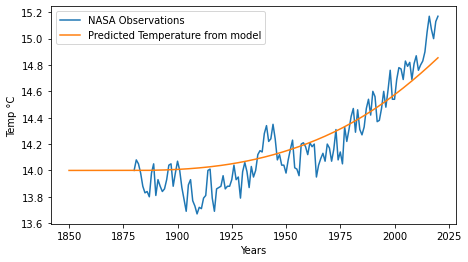

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(df['Year'].tolist(), df['No_Smoothing'].tolist(), label='NASA Observations')
plt.plot(range(1850, 2021), solp4.y[0], label='Predicted Temperature from model')
plt.xlabel('Years')
plt.ylabel('Temp °C')
plt.legend()
plt.show()

# Improving the model

In [ ]:
def calc_alpha(T, alpha_0=0.3, alpha_i=0.5, delta_T=10.0):
  if T < -delta_T:
    return alpha_i
  elif -delta_T <= T < delta_T:
    return alpha_i + (alpha_0 - alpha_i) * (T + delta_T) / (2 * delta_T)
  elif T >= delta_T:
    return alpha_0

F_final = lambda t, s: ((1/85.0) * (BB * (temp0 - s) + \
                       calc_greenhouse_effect(CO2_PreIndust * (1 + np.power((t/220), 3))))) * ((1/85.0) * (S * (1 - calc_alpha(t))/4))
solp_final = solve_ivp(F_final, [0, 171], [start_temp], t_eval=np.arange(0, 171, 1))
solp_final

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147

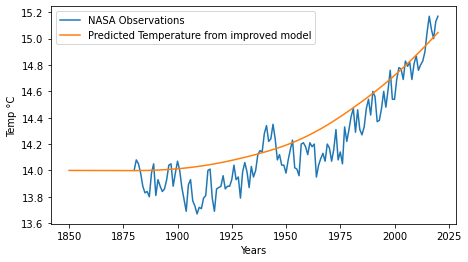

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(df['Year'].tolist(), df['No_Smoothing'].tolist(), label='NASA Observations')
plt.plot(range(1850, 2021), solp_final.y[0], label='Predicted Temperature from improved model')
plt.xlabel('Years')
plt.ylabel('Temp °C')
plt.legend()
plt.show()